In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [12]:
beer_df = pd.read_csv('beer.csv')
beer_df[0:8]

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42


In [5]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalled_beer_df = scalar.fit_transform(beer_df[['calories','sodium','alcohol','cost']])
scalled_beer_df

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

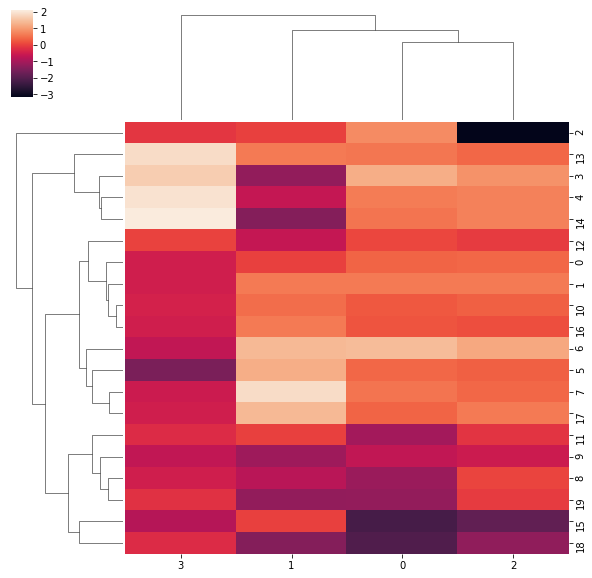

In [6]:
sn.clustermap(scalled_beer_df)

In [8]:
from sklearn.cluster import KMeans

In [14]:
clusters = KMeans(3)
clusters.fit(beer_df[['calories','cost']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [16]:
beer_df['clusterid'] = clusters.labels_

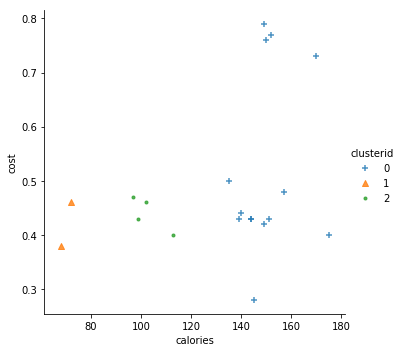

In [19]:
sn.lmplot(x='calories',y='cost', data=beer_df, fit_reg=False, hue='clusterid', markers=['+','^','.'])